<a href="https://colab.research.google.com/github/mahimna/625-722-Project/blob/main/625_722_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from itertools import product
import pandas as pd
import random
from matplotlib import pyplot as plt

from google.colab import drive
drive.mount('/content/gdrive')

import json

Mounted at /content/gdrive


In [35]:
class TicTacToe():
  def __init__(self,player = 'X'):
    '''
    player: Role that the bot is playing. If X then bot goes first
    '''
    self.board = np.array(['__']*9).reshape(3,3)
    if player == 'X':
      self.player ='X'
      self.id = 1
      self.opponent = 'O'
    else:
      self.player = 'O'
      self.id = 2
      self.opponent = 'X'
  
    self.game_over = False

    # Mapping of the visual representation of a move to its numerical tuple representation
    self.b_to_t = {'__':0,'X':1,'O':2} 
    # Mapping of the numerical tuple representation of a move to its visual representation
    self.t_to_b = {0:'__',1:'X',2:'O'} 
    
    # Mapping all of the board positions to a 1D tuple. The top left element in the board is
    # the first element in the tuple and the reest are stored row-sie 
    positions = self.available_positions()
    self.b2_to_t1 = {position:i for (i,position) in enumerate(positions)}
    
    #Create a mapping from a tuple to its 2D board state
    self.t1_to_b2 = {i:position for (i,position) in enumerate(positions)}
    
    self.starting_state = self.board_to_state()
      
  def reset_board(self):
    "Function to reset the board back to clean slate"
    self.board = np.array(['__']*9).reshape(3,3)
    self.starting_state = self.board_to_state()
    self.game_over = False

  def show_board(self):    
    "Displaying the board as a 2D dataframe"
    return pd.DataFrame(self.board)

  def board_to_state(self):
    "Convert a 2D board to a state in the 9 element tuple format"
    return tuple([self.b_to_t[x] for x in np.ravel(self.board)])

  @staticmethod
  def possible_actions(state):
    "The possible next actions possible from the current state"
    "Returns all positions that are currently empty"
    return [i for i,x  in enumerate(state) if x ==0]

  def is_game_over(self):
    "Function which checks if the game is over by seeing if there are no unfilled"
    "positions left"
    if not np.any(self.board == '__') :
      self.game_over = True
        
    return self.game_over

  def available_positions(self):
    "Returns all available positions on the board by checking empty squares"
    x,y = np.where(self.board =='__')
    return[(x,y) for x,y in zip(x,y)]

  def win(self,player):
    "Check if player won the game where player is 'X' or 'O'"
    if np.all(self.board[0,:] == player):
      return True
    elif np.all(self.board[1,:] == player): 
      return True
    elif np.all(self.board[2,:] == player):
      return True
    elif np.all(self.board[:,0] == player):
      return True
    elif np.all(self.board[:,1] == player):
      return True
    elif np.all(self.board[:,2] == player):
      return True
    elif np.all(self.board.diagonal()==player):
      return True
    elif  np.all(np.fliplr(self.board).diagonal()==player):
      return True
    else:
      return False
    
    return True

  def my_move(self,position):
    "Fills out the board in the given position with the action of the bot"
    
    assert position[0] >= 0 and position[0] <= 2 and position[1] >= 0 and position[1] <= 2 , "incorrect position"
    assert self.board[position] == "__" , "position already filled"
    assert np.any(self.board == '__') , "Board is complete"
    assert self.win(self.player) == False and self.win(self.opponent)== False , " Game has already been won"
    self.board[position] = self.player
    
    player_win = self.win(self.player)
    opponent_win = self.win(self.opponent)
    
    if player_win:
      self.game_over = True
      return 1
  
    elif opponent_win:
      self.game_over = True
      return -1
    
    else:
      return 0

  def opponent_move(self,position):
    "Fills out the board in the given position with the action of the opponent"
    assert position[0] >= 0 and position[0] <= 2 and position[1] >= 0 and position[1] <= 2 , "incorrect position"
    assert self.board[position] == "__" , "position already filled"
    assert np.any(self.board == '__') , "Board is complete"
    assert self.win(self.player) == False and self.win(self.opponent)== False , " Game has already been won"
    self.board[position] = self.opponent

    player_win = self.win(self.player)
    opponent_win = self.win(self.opponent)

    if player_win:
      self.game_over = True
      return 1
  
    elif opponent_win:
      self.game_over = True
      return -1
    
    else:
      return 0

  def pick_random_action(self):
    current_state = self.board_to_state()
    actions = self.possible_actions(current_state)
    return self.t1_to_b2[np.random.choice(actions)]
  
  def pick_action_based_on_state_values(self, state_values):
    current_state = self.board_to_state()
    actions = self.possible_actions(current_state)

    best_move = None
    best_move_value = -np.Inf

    for action in actions:
      position = self.t1_to_b2[action]
      self.board[position] = self.player
      new_state = self.board_to_state()
      cur_value = state_values[new_state]
      if cur_value > best_move_value:
        best_move = position
        best_move_value = cur_value
      self.board[position] = '__'
    
    return best_move
  
  def pick_action_based_on_state_values_plus_random(self, state_values):
    current_state = self.board_to_state()
    actions = self.possible_actions(current_state)

    best_move = None
    highest_value = -np.Inf
    lowest_value = np.Inf

    for action in actions:
      position = self.t1_to_b2[action]
      self.board[position] = self.player
      new_state = self.board_to_state()
      cur_value = state_values[new_state]
      if cur_value > highest_value:
        highest_value = cur_value
      if cur_value < lowest_value:
        lowest_value = cur_value
      self.board[position] = '__'
    

    threshold_value = lowest_value + (highest_value - lowest_value)*0.05
    
    possible_moves = []
    
    for action in actions:
      position = self.t1_to_b2[action]
      self.board[position] = self.player
      new_state = self.board_to_state()
      cur_value = state_values[new_state]
      if cur_value >= threshold_value:
        possible_moves.append(position)
      self.board[position] = '__'

    best_move_ind = np.random.randint(0,high=len(possible_moves))

    best_move = possible_moves[best_move_ind]

    return best_move
  
  def pick_action_based_on_state_values_opponent(self, state_values):
    current_state = self.board_to_state()
    actions = self.possible_actions(current_state)

    best_move = None
    best_move_value = np.Inf

    for action in actions:
      position = self.t1_to_b2[action]
      self.board[position] = self.player
      new_state = self.board_to_state()
      cur_value = state_values[new_state]
      if cur_value < best_move_value:
        best_move = position
        best_move_value = cur_value
      self.board[position] = '__'
    
    return best_move


In [3]:
def play_game():
  states = []
  
  t_board_X = TicTacToe(player = 'X')
  result = 0
  i = 0

  states.append(t_board_X.board_to_state())
  while not t_board_X.is_game_over():
    move = t_board_X.pick_random_action()
    if i % 2 == 0:
      result = t_board_X.my_move(move)
    elif i % 2 == 1:
      result = t_board_X.opponent_move(move)

    states.append(t_board_X.board_to_state())
    i += 1

    if result != 0:
      break

  return (states, result)

In [4]:
def play_game_with_state_values(state_values):
  states = []
  
  t_board_X = TicTacToe(player = 'X')
  result = 0
  i = 0

  states.append(t_board_X.board_to_state())
  while not t_board_X.is_game_over():
    if i % 2 == 0:
      move = t_board_X.pick_action_based_on_state_values(state_values)
      result = t_board_X.my_move(move)
    elif i % 2 == 1:
      move = t_board_X.pick_random_action()
      result = t_board_X.opponent_move(move)

    states.append(t_board_X.board_to_state())
    i += 1

    if result != 0:
      break
  return (states, result)

In [19]:
def play_game_with_opponent_state_values(state_values):
  states = []
  
  t_board_X = TicTacToe(player = 'X')
  result = 0
  i = 0

  states.append(t_board_X.board_to_state())
  while not t_board_X.is_game_over():
    display(t_board_X.board)
    if i % 2 == 0:
      move = t_board_X.pick_action_based_on_state_values(state_values)
      result = t_board_X.my_move(move)
    elif i % 2 == 1:
      move = t_board_X.pick_action_based_on_state_values_opponent(state_values)
      result = t_board_X.opponent_move(move)

    states.append(t_board_X.board_to_state())
    i += 1

    if result != 0:
      break
  display(t_board_X.board)
  return (states, result)

In [6]:
def play_game_with_real_player_state_values(state_values):
  states = []
  
  t_board_X = TicTacToe(player = 'X')
  result = 0
  i = 0

  states.append(t_board_X.board_to_state())
  while not t_board_X.is_game_over():
    display(t_board_X.board)
    if i % 2 == 0:
      move = t_board_X.pick_action_based_on_state_values(state_values)
      result = t_board_X.my_move(move)
    elif i % 2 == 1:
      input_move = input("Please enter input")
      split_input = input_move.split(",")
      move = (int(split_input[0]),int(split_input[1]))
      result = t_board_X.opponent_move(move)

    states.append(t_board_X.board_to_state())
    i += 1

    if result != 0:
      break
  display(t_board_X.board)
  return (states, result)

In [36]:
def play_game_with_state_values_plus_random(state_values):
  states = []
  
  t_board_X = TicTacToe(player = 'X')
  result = 0
  i = 0

  states.append(t_board_X.board_to_state())
  while not t_board_X.is_game_over():
    if i % 2 == 0:
      move = t_board_X.pick_action_based_on_state_values_plus_random(state_values)
      result = t_board_X.my_move(move)
    elif i % 2 == 1:
      move = t_board_X.pick_random_action()
      result = t_board_X.opponent_move(move)

    states.append(t_board_X.board_to_state())
    i += 1

    if result != 0:
      break
  return (states, result)

In [21]:
def evaluate_state_values(state_values):
  num_ties_trained = 0
  num_wins_trained = 0
  num_losses_trained = 0
  num_games_trained = 100

  for i in range(num_games_trained):
    _, result = play_game_with_state_values(state_values)
    if result == 0:
      num_ties_trained += 1
    elif result == 1:
      num_wins_trained += 1
    elif result == -1:
      num_losses_trained += 1
  
  return num_wins_trained

In [37]:
def evaluate_state_values_plus_random(state_values):
  num_ties_trained = 0
  num_wins_trained = 0
  num_losses_trained = 0
  num_games_trained = 100

  for i in range(num_games_trained):
    _, result = play_game_with_state_values_plus_random(state_values)
    if result == 0:
      num_ties_trained += 1
    elif result == 1:
      num_wins_trained += 1
    elif result == -1:
      num_losses_trained += 1
  
  return num_wins_trained

In [38]:
l_o_l = [list(range(3)) for _ in range(9)]
states = set(product(*l_o_l))
state_values = {}
for state in states:
  state_values[state] = 0

num_ties = 0
num_wins = 0
num_losses = 0
num_games = 4000
alpha = 0.2
state_evaluations = []

for i in range(num_games):
  game_states, result = play_game()
  len_states = len(game_states)
  if result == 0:
    num_ties += 1
    continue
  elif result == 1:
    num_wins += 1
    state_values[game_states[len_states-1]] += 1
    ind = len_states-2
    while ind >= 0:
      state_values[game_states[ind]] += alpha*(state_values[game_states[ind+1]]-state_values[game_states[ind]])
      ind -= 1
  elif result == -1:
    num_losses += 1
    state_values[game_states[len_states-1]] += -1
    ind = len_states-2
    while ind >= 0:
      state_values[game_states[ind]] += alpha*(state_values[game_states[ind+1]]-state_values[game_states[ind]])
      ind -= 1
  state_evaluations.append(evaluate_state_values_plus_random(state_values))

print("num_wins: " + str(num_wins))
print("num_losses: " + str(num_losses))
print("num_ties: " + str(num_ties))

num_wins: 2394
num_losses: 1108
num_ties: 498


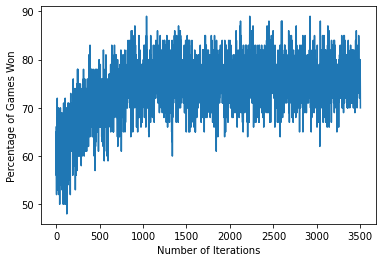

In [39]:
plt.plot(state_evaluations)
plt.xlabel('Number of Iterations')
plt.ylabel('Percentage of Games Won')

plt.show()

In [ ]:
def remap_keys(mapping):
    return [{'key':k, 'value': v} for k, v in mapping.items()]

with open('/content/gdrive/My Drive/Colab Notebooks/trained_state_values_10000.txt', 'w') as state_values_file:
     state_values_file.write(json.dumps(remap_keys(state_values)))

In [ ]:
with open('/content/gdrive/My Drive/Colab Notebooks/trained_state_values.txt') as state_values_file:
  state_values_from_file = json.load(state_values_file)
  state_values_new = {}
  for item in state_values_from_file:
    state_values_new[tuple(item['key'])] = item['value']

In [ ]:
num_ties_trained = 0
num_wins_trained = 0
num_losses_trained = 0
num_games_trained = 100

for i in range(num_games_trained):
  _, result = play_game_with_state_values(state_values)
  if result == 0:
    num_ties_trained += 1
  elif result == 1:
    num_wins_trained += 1
  elif result == -1:
    num_losses_trained += 1

print("num_wins: " + str(num_wins_trained))
print("num_losses: " + str(num_losses_trained))
print("num_ties: " + str(num_ties_trained))

num_wins: 81
num_losses: 13
num_ties: 6


In [ ]:
num_ties_trained = 0
num_wins_trained = 0
num_losses_trained = 0
num_games_trained = 10

for i in range(num_games_trained):
  _, result = play_game_with_opponent_state_values(state_values)
  print(result)
  if result == 0:
    num_ties_trained += 1
  elif result == 1:
    num_wins_trained += 1
  elif result == -1:
    num_losses_trained += 1

print("num_wins: " + str(num_wins_trained))
print("num_losses: " + str(num_losses_trained))
print("num_ties: " + str(num_ties_trained))

array([['__', '__', '__'],
       ['__', '__', '__'],
       ['__', '__', '__']], dtype='<U2')

array([['X', '__', '__'],
       ['__', '__', '__'],
       ['__', '__', '__']], dtype='<U2')

array([['X', 'O', '__'],
       ['__', '__', '__'],
       ['__', '__', '__']], dtype='<U2')

array([['X', 'O', '__'],
       ['X', '__', '__'],
       ['__', '__', '__']], dtype='<U2')

array([['X', 'O', 'O'],
       ['X', '__', '__'],
       ['__', '__', '__']], dtype='<U2')

array([['X', 'O', 'O'],
       ['X', '__', 'X'],
       ['__', '__', '__']], dtype='<U2')

array([['X', 'O', 'O'],
       ['X', 'O', 'X'],
       ['__', '__', '__']], dtype='<U2')

array([['X', 'O', 'O'],
       ['X', 'O', 'X'],
       ['X', '__', '__']], dtype='<U2')

1


array([['__', '__', '__'],
       ['__', '__', '__'],
       ['__', '__', '__']], dtype='<U2')

array([['X', '__', '__'],
       ['__', '__', '__'],
       ['__', '__', '__']], dtype='<U2')

array([['X', 'O', '__'],
       ['__', '__', '__'],
       ['__', '__', '__']], dtype='<U2')

array([['X', 'O', '__'],
       ['X', '__', '__'],
       ['__', '__', '__']], dtype='<U2')

array([['X', 'O', 'O'],
       ['X', '__', '__'],
       ['__', '__', '__']], dtype='<U2')

array([['X', 'O', 'O'],
       ['X', '__', 'X'],
       ['__', '__', '__']], dtype='<U2')

array([['X', 'O', 'O'],
       ['X', 'O', 'X'],
       ['__', '__', '__']], dtype='<U2')

array([['X', 'O', 'O'],
       ['X', 'O', 'X'],
       ['X', '__', '__']], dtype='<U2')

1


array([['__', '__', '__'],
       ['__', '__', '__'],
       ['__', '__', '__']], dtype='<U2')

array([['X', '__', '__'],
       ['__', '__', '__'],
       ['__', '__', '__']], dtype='<U2')

array([['X', 'O', '__'],
       ['__', '__', '__'],
       ['__', '__', '__']], dtype='<U2')

array([['X', 'O', '__'],
       ['X', '__', '__'],
       ['__', '__', '__']], dtype='<U2')

array([['X', 'O', 'O'],
       ['X', '__', '__'],
       ['__', '__', '__']], dtype='<U2')

array([['X', 'O', 'O'],
       ['X', '__', 'X'],
       ['__', '__', '__']], dtype='<U2')

array([['X', 'O', 'O'],
       ['X', 'O', 'X'],
       ['__', '__', '__']], dtype='<U2')

array([['X', 'O', 'O'],
       ['X', 'O', 'X'],
       ['X', '__', '__']], dtype='<U2')

1


array([['__', '__', '__'],
       ['__', '__', '__'],
       ['__', '__', '__']], dtype='<U2')

array([['X', '__', '__'],
       ['__', '__', '__'],
       ['__', '__', '__']], dtype='<U2')

array([['X', 'O', '__'],
       ['__', '__', '__'],
       ['__', '__', '__']], dtype='<U2')

array([['X', 'O', '__'],
       ['X', '__', '__'],
       ['__', '__', '__']], dtype='<U2')

array([['X', 'O', 'O'],
       ['X', '__', '__'],
       ['__', '__', '__']], dtype='<U2')

array([['X', 'O', 'O'],
       ['X', '__', 'X'],
       ['__', '__', '__']], dtype='<U2')

array([['X', 'O', 'O'],
       ['X', 'O', 'X'],
       ['__', '__', '__']], dtype='<U2')

array([['X', 'O', 'O'],
       ['X', 'O', 'X'],
       ['X', '__', '__']], dtype='<U2')

1


array([['__', '__', '__'],
       ['__', '__', '__'],
       ['__', '__', '__']], dtype='<U2')

array([['X', '__', '__'],
       ['__', '__', '__'],
       ['__', '__', '__']], dtype='<U2')

array([['X', 'O', '__'],
       ['__', '__', '__'],
       ['__', '__', '__']], dtype='<U2')

array([['X', 'O', '__'],
       ['X', '__', '__'],
       ['__', '__', '__']], dtype='<U2')

array([['X', 'O', 'O'],
       ['X', '__', '__'],
       ['__', '__', '__']], dtype='<U2')

array([['X', 'O', 'O'],
       ['X', '__', 'X'],
       ['__', '__', '__']], dtype='<U2')

array([['X', 'O', 'O'],
       ['X', 'O', 'X'],
       ['__', '__', '__']], dtype='<U2')

array([['X', 'O', 'O'],
       ['X', 'O', 'X'],
       ['X', '__', '__']], dtype='<U2')

1


array([['__', '__', '__'],
       ['__', '__', '__'],
       ['__', '__', '__']], dtype='<U2')

array([['X', '__', '__'],
       ['__', '__', '__'],
       ['__', '__', '__']], dtype='<U2')

array([['X', 'O', '__'],
       ['__', '__', '__'],
       ['__', '__', '__']], dtype='<U2')

array([['X', 'O', '__'],
       ['X', '__', '__'],
       ['__', '__', '__']], dtype='<U2')

array([['X', 'O', 'O'],
       ['X', '__', '__'],
       ['__', '__', '__']], dtype='<U2')

array([['X', 'O', 'O'],
       ['X', '__', 'X'],
       ['__', '__', '__']], dtype='<U2')

array([['X', 'O', 'O'],
       ['X', 'O', 'X'],
       ['__', '__', '__']], dtype='<U2')

array([['X', 'O', 'O'],
       ['X', 'O', 'X'],
       ['X', '__', '__']], dtype='<U2')

1


array([['__', '__', '__'],
       ['__', '__', '__'],
       ['__', '__', '__']], dtype='<U2')

array([['X', '__', '__'],
       ['__', '__', '__'],
       ['__', '__', '__']], dtype='<U2')

array([['X', 'O', '__'],
       ['__', '__', '__'],
       ['__', '__', '__']], dtype='<U2')

array([['X', 'O', '__'],
       ['X', '__', '__'],
       ['__', '__', '__']], dtype='<U2')

array([['X', 'O', 'O'],
       ['X', '__', '__'],
       ['__', '__', '__']], dtype='<U2')

array([['X', 'O', 'O'],
       ['X', '__', 'X'],
       ['__', '__', '__']], dtype='<U2')

array([['X', 'O', 'O'],
       ['X', 'O', 'X'],
       ['__', '__', '__']], dtype='<U2')

array([['X', 'O', 'O'],
       ['X', 'O', 'X'],
       ['X', '__', '__']], dtype='<U2')

1


array([['__', '__', '__'],
       ['__', '__', '__'],
       ['__', '__', '__']], dtype='<U2')

array([['X', '__', '__'],
       ['__', '__', '__'],
       ['__', '__', '__']], dtype='<U2')

array([['X', 'O', '__'],
       ['__', '__', '__'],
       ['__', '__', '__']], dtype='<U2')

array([['X', 'O', '__'],
       ['X', '__', '__'],
       ['__', '__', '__']], dtype='<U2')

array([['X', 'O', 'O'],
       ['X', '__', '__'],
       ['__', '__', '__']], dtype='<U2')

array([['X', 'O', 'O'],
       ['X', '__', 'X'],
       ['__', '__', '__']], dtype='<U2')

array([['X', 'O', 'O'],
       ['X', 'O', 'X'],
       ['__', '__', '__']], dtype='<U2')

array([['X', 'O', 'O'],
       ['X', 'O', 'X'],
       ['X', '__', '__']], dtype='<U2')

1


array([['__', '__', '__'],
       ['__', '__', '__'],
       ['__', '__', '__']], dtype='<U2')

array([['X', '__', '__'],
       ['__', '__', '__'],
       ['__', '__', '__']], dtype='<U2')

array([['X', 'O', '__'],
       ['__', '__', '__'],
       ['__', '__', '__']], dtype='<U2')

array([['X', 'O', '__'],
       ['X', '__', '__'],
       ['__', '__', '__']], dtype='<U2')

array([['X', 'O', 'O'],
       ['X', '__', '__'],
       ['__', '__', '__']], dtype='<U2')

array([['X', 'O', 'O'],
       ['X', '__', 'X'],
       ['__', '__', '__']], dtype='<U2')

array([['X', 'O', 'O'],
       ['X', 'O', 'X'],
       ['__', '__', '__']], dtype='<U2')

array([['X', 'O', 'O'],
       ['X', 'O', 'X'],
       ['X', '__', '__']], dtype='<U2')

1


array([['__', '__', '__'],
       ['__', '__', '__'],
       ['__', '__', '__']], dtype='<U2')

array([['X', '__', '__'],
       ['__', '__', '__'],
       ['__', '__', '__']], dtype='<U2')

array([['X', 'O', '__'],
       ['__', '__', '__'],
       ['__', '__', '__']], dtype='<U2')

array([['X', 'O', '__'],
       ['X', '__', '__'],
       ['__', '__', '__']], dtype='<U2')

array([['X', 'O', 'O'],
       ['X', '__', '__'],
       ['__', '__', '__']], dtype='<U2')

array([['X', 'O', 'O'],
       ['X', '__', 'X'],
       ['__', '__', '__']], dtype='<U2')

array([['X', 'O', 'O'],
       ['X', 'O', 'X'],
       ['__', '__', '__']], dtype='<U2')

array([['X', 'O', 'O'],
       ['X', 'O', 'X'],
       ['X', '__', '__']], dtype='<U2')

1
num_wins: 10
num_losses: 0
num_ties: 0


In [17]:
play_game_with_real_player_state_values(state_values)

array([['__', '__', '__'],
       ['__', '__', '__'],
       ['__', '__', '__']], dtype='<U2')

array([['X', '__', '__'],
       ['__', '__', '__'],
       ['__', '__', '__']], dtype='<U2')

Please enter input1,1


array([['X', '__', '__'],
       ['__', 'O', '__'],
       ['__', '__', '__']], dtype='<U2')

array([['X', '__', '__'],
       ['X', 'O', '__'],
       ['__', '__', '__']], dtype='<U2')

Please enter input2,0


array([['X', '__', '__'],
       ['X', 'O', '__'],
       ['O', '__', '__']], dtype='<U2')

array([['X', '__', 'X'],
       ['X', 'O', '__'],
       ['O', '__', '__']], dtype='<U2')

Please enter input2,1


array([['X', '__', 'X'],
       ['X', 'O', '__'],
       ['O', 'O', '__']], dtype='<U2')

array([['X', 'X', 'X'],
       ['X', 'O', '__'],
       ['O', 'O', '__']], dtype='<U2')

([(0, 0, 0, 0, 0, 0, 0, 0, 0),
  (1, 0, 0, 0, 0, 0, 0, 0, 0),
  (1, 0, 0, 0, 2, 0, 0, 0, 0),
  (1, 0, 0, 1, 2, 0, 0, 0, 0),
  (1, 0, 0, 1, 2, 0, 2, 0, 0),
  (1, 0, 1, 1, 2, 0, 2, 0, 0),
  (1, 0, 1, 1, 2, 0, 2, 2, 0),
  (1, 1, 1, 1, 2, 0, 2, 2, 0)],
 1)

In [ ]:
print(states)

frozenset({(2, 2, 2, 1, 1, 2, 0, 0, 1), (1, 2, 1, 1, 2, 0, 1, 2, 0), (0, 0, 1, 1, 1, 2, 2, 0, 0), (2, 1, 1, 0, 1, 2, 2, 2, 0), (2, 1, 2, 0, 1, 2, 2, 2, 0), (0, 1, 2, 1, 1, 1, 1, 0, 1), (1, 0, 0, 0, 1, 0, 1, 1, 2), (1, 1, 0, 1, 0, 2, 0, 1, 2), (0, 2, 0, 2, 0, 1, 2, 0, 2), (2, 1, 2, 1, 2, 2, 0, 0, 1), (0, 2, 0, 2, 0, 1, 2, 0, 1), (1, 2, 2, 2, 1, 2, 1, 1, 0), (1, 0, 0, 1, 1, 0, 0, 0, 0), (2, 1, 2, 1, 2, 2, 0, 0, 2), (2, 0, 2, 0, 2, 2, 0, 0, 1), (1, 2, 1, 0, 2, 0, 0, 0, 1), (0, 0, 2, 1, 0, 2, 2, 0, 1), (2, 2, 1, 0, 0, 1, 2, 0, 2), (1, 1, 1, 0, 2, 2, 1, 2, 0), (0, 1, 0, 0, 1, 2, 1, 2, 2), (1, 1, 0, 2, 0, 1, 1, 1, 0), (0, 0, 0, 1, 0, 0, 0, 2, 2), (0, 0, 2, 1, 2, 0, 0, 0, 0), (1, 2, 1, 2, 2, 0, 2, 2, 0), (0, 2, 2, 1, 0, 1, 2, 2, 1), (2, 1, 0, 2, 2, 0, 0, 2, 0), (1, 0, 0, 2, 0, 1, 1, 0, 2), (0, 2, 1, 0, 0, 1, 1, 1, 2), (1, 2, 0, 2, 0, 2, 0, 0, 1), (0, 2, 2, 1, 0, 1, 2, 2, 2), (1, 2, 2, 0, 2, 1, 2, 2, 0), (2, 2, 0, 1, 1, 2, 0, 2, 0), (0, 0, 0, 2, 1, 0, 0, 1, 1), (1, 0, 0, 2, 0, 1, 1, 0, 1), (0,

In [ ]:
t_board_X = TicTacToe(player = 'X',reward_type ='goal_reward')
t_board_X.show_board()

,0,1,2
0,__,__,__
1,__,__,__
2,__,__,__


In [ ]:
move = t_board_X.pick_random_action()

In [ ]:
t_board_X.my_move(move)

0

In [ ]:
t_board_X.show_board()


,0,1,2
0,__,__,__
1,__,X,__
2,__,__,__


In [ ]:
move = t_board_X.pick_random_action()

In [ ]:
t_board_X.opponent_move(move)

In [ ]:
t_board_X.show_board()


,0,1,2
0,__,__,__
1,__,X,__
2,__,__,O


In [ ]:
t_board_X.board_to_state()

(0, 0, 0, 0, 1, 0, 0, 0, 2)